In [76]:
import numpy as np
import pandas as pd

import warnings
import sklearn.metrics
import sklearn.calibration
import sklearn.utils._testing
import sklearn.exceptions

from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt
from sklearn.svm import SVC

from statistics import mean, stdev

from decimal import Decimal



from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate


import nltk
from nltk.corpus import stopwords
# print(stopwords.words('english'))


x_train_df = pd.read_csv('data_reviews/x_train.csv')
x_test_df = pd.read_csv('data_reviews/x_test.csv')
y_train_df = pd.read_csv('data_reviews/y_train.csv')

tr_text_list = x_train_df['text'].values.tolist()
te_text_list = x_test_df['text'].values.tolist()
y_train_df = y_train_df['is_positive_sentiment']


In [58]:
# pre-processing language data 

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
moreStopWords = ['amazon','yelp', 'imdb']
stopwords.extend(moreStopWords)

vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(1, 3), max_df=0.9, stop_words=stopwords)
transform_input = vectorizer.fit_transform(tr_text_list)
transform_te_input = vectorizer.transform(te_text_list)
# y_train_df = np.ravel(y_train_df)
y_train_df

# processed_text_list = CountVectorizer(analyzer='char_wb', ngram_range=(1, 3), max_df=0.9)

print(np.shape(transform_input), np.shape(transform_te_input))

# x_train, x_test, y_train, y_test = train_test_split(transform_input, y_train_df)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishaanarora/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(2400, 6503) (600, 6503)


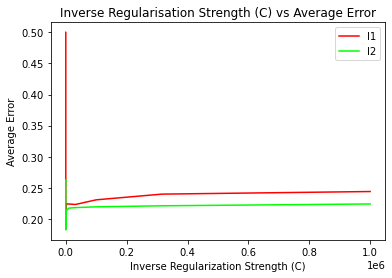

0.18249999999999988
0.19833333333333325


In [59]:
# Part 2 - Logistic Classifier

C_grid = np.logspace(-9, 6, 31)

f_logreg = LogisticRegressionCV(solver='liblinear', Cs=C_grid, penalty='l1', cv=20)
f_logreg.fit(transform_input, y_train_df)

error = 1 - f_logreg.scores_[1].mean(axis=0)

f_logreg_l2 = LogisticRegressionCV(solver='liblinear', Cs=C_grid, penalty='l2', cv=20)
f_logreg_l2.fit(transform_input, y_train_df)

error_l2 = 1 - f_logreg_l2.scores_[1].mean(axis=0)

# Create a figure
plt.figure()

# Plot the relationship between C and the average error
plt.plot(f_logreg.Cs_, error, label='l1', color="#FF0000")
plt.plot(f_logreg_l2.Cs_, error_l2, label='l2', color="#00FF00")

# Add labels and title
plt.xlabel('Inverse Regularization Strength (C)')
plt.ylabel('Average Error')
plt.title('Inverse Regularisation Strength (C) vs Average Error')

# Show the figure
plt.legend()
plt.show()
print(min(error_l2))
print(min(error))

yproba1_test = f_logreg_l2.predict_proba(transform_te_input)[:, 1] 
np.savetxt('yproba1_test.txt', yproba1_test)




# classifier = LogisticRegression(solver='liblinear')
# classifier.fit(transform_input, np.array(y_train_df))




In [60]:
logreg_l1 = LogisticRegression(solver='liblinear', C=f_logreg.C_[0], penalty='l1')
scores = cross_val_score(logreg_l1, transform_input, y_train_df, cv=20, scoring="neg_log_loss")
acc_scores = cross_validate(logreg_l1, transform_input, y_train_df, cv=20, scoring=['accuracy'])
val_err_l1 = acc_scores['test_accuracy']
val_err_l1 = [1 - x for x in val_err_l1]


logreg_l2 = LogisticRegression(solver='liblinear', C=f_logreg_l2.C_[0], penalty='l2')
scores_l2 = cross_val_score(logreg_l2, transform_input, y_train_df, cv=20, scoring="neg_log_loss")

acc_scores_l2 = cross_validate(logreg_l2, transform_input, y_train_df, cv=20, scoring=['accuracy'])
val_err_l2 = acc_scores_l2['test_accuracy']
val_err_l2 = [1 - x for x in val_err_l2]

# Calculate the average error for each fold
avg_error_train = -scores
avg_error_train_l2 = -scores_l2

# print(avg_error_train)
# print(val_err_l1)



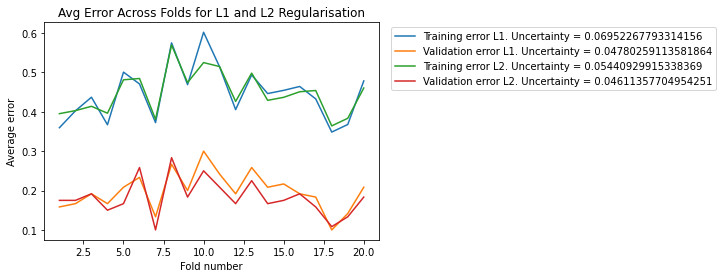

C value=  3.1622776601683795


In [87]:
# plot 
plt.title("Avg Error Across Folds for L1 and L2 Regularisation")
plt.plot(range(1, 21), avg_error_train, label="Training error L1. Uncertainty = " + str(stdev(avg_error_train)))
plt.plot(range(1, 21), val_err_l1, label="Validation error L1. Uncertainty = " + str(stdev(val_err_l1)))
plt.plot(range(1, 21), avg_error_train_l2, label="Training error L2. Uncertainty = " + str(stdev(avg_error_train_l2)))
plt.plot(range(1, 21), val_err_l2, label="Validation error L2. Uncertainty = " + str(stdev(val_err_l2)))
plt.xlabel("Fold number")
plt.ylabel("Average error")
plt.legend(bbox_to_anchor=(1.02, 1))
plt.show()
print("C value= ", f_logreg.C_[0])

In [63]:
C_grid = np.logspace(-9, 6, 5)

# logreg_1 = LogisticRegression(solver='liblinear', C=C_grid[0])
# scores_1 = cross_val_score(logreg_1, transform_input, y_train_df, cv=20, scoring="neg_log_loss")
# acc_scores_1 = cross_validate(logreg_1, transform_input, y_train_df, cv=20, scoring=['accuracy'])
# val_err_1 = acc_scores_1['test_accuracy']
# val_err_1 = [1 - x for x in val_err_1]
# avg_error_train_1 = -scores_1

logreg_2 = LogisticRegression(solver='liblinear', C=C_grid[1])
scores_2 = cross_val_score(logreg_2, transform_input, y_train_df, cv=20, scoring="neg_log_loss")
acc_scores_2 = cross_validate(logreg_2, transform_input, y_train_df, cv=20, scoring=['accuracy'])
val_err_2 = acc_scores_2['test_accuracy']
val_err_2 = [1 - x for x in val_err_2]
avg_error_train_2 = -scores_2

logreg_3 = LogisticRegression(solver='liblinear', C=C_grid[2])
scores_3 = cross_val_score(logreg_3, transform_input, y_train_df, cv=20, scoring="neg_log_loss")
acc_scores_3 = cross_validate(logreg_3, transform_input, y_train_df, cv=20, scoring=['accuracy'])
val_err_3 = acc_scores_3['test_accuracy']
val_err_3 = [1 - x for x in val_err_3]
avg_error_train_3 = -scores_3

logreg_4 = LogisticRegression(solver='liblinear', C=C_grid[3])
scores_4 = cross_val_score(logreg_4, transform_input, y_train_df, cv=20, scoring="neg_log_loss")
acc_scores_4 = cross_validate(logreg_4, transform_input, y_train_df, cv=20, scoring=['accuracy'])
val_err_4 = acc_scores_4['test_accuracy']
val_err_4 = [1 - x for x in val_err_4]
avg_error_train_4 = -scores_4

# logreg_5 = LogisticRegression(solver='liblinear', C=C_grid[4])
# scores_5 = cross_val_score(logreg_5, transform_input, y_train_df, cv=20, scoring="neg_log_loss")
# acc_scores_5 = cross_validate(logreg_5, transform_input, y_train_df, cv=20, scoring=['accuracy'])
# val_err_5 = acc_scores['test_accuracy']
# val_err_5 = [1 - x for x in val_err_5]
# avg_error_train_5 = -scores_5

# print(C_grid[0])
# print(C_grid[1])
# print(avg_error_train_5)

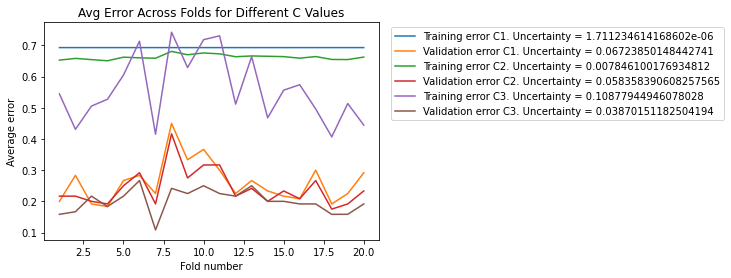

In [81]:
plt.title("Avg Error Across Folds for Different C Values")
# plt.plot(range(1, 21), avg_error_train_1, label="Training error C1")
# plt.plot(range(1, 21), val_err_1, label="Validation error C1")
plt.plot(range(1, 21), avg_error_train_2, label="Training error C1. Uncertainty = " + str(stdev(avg_error_train_2)))
plt.plot(range(1, 21), val_err_2, label="Validation error C1. Uncertainty = "+ str(stdev(val_err_2)))
plt.plot(range(1, 21), avg_error_train_3, label="Training error C2. Uncertainty = "+ str(stdev(avg_error_train_3)))
plt.plot(range(1, 21), val_err_3, label="Validation error C2. Uncertainty = "+ str(stdev(val_err_3)))
plt.plot(range(1, 21), avg_error_train_4, label="Training error C3. Uncertainty = "+ str(stdev(avg_error_train_4)))
plt.plot(range(1, 21), val_err_4, label="Validation error C3. Uncertainty = "+ str(stdev(val_err_4)))
# plt.plot(range(1, 21), avg_error_train_5, label="Training error C5")
# plt.plot(range(1, 21), val_err_5, label="Validation error C5")
plt.xlabel("Fold number")
plt.ylabel("Average error")
plt.legend(bbox_to_anchor=(1.02, 1))
plt.show()

#TODO: uncertainty of these results (std deviation across k folds)

In [65]:
print("Uncertainty for C1 training error: ", stdev(avg_error_train_2))
print("Uncertainty for C1 validation error: ", stdev(val_err_2))
print("Uncertainty for C2 training error: ", stdev(avg_error_train_3))
print("Uncertainty for C2 validation error: ", stdev(val_err_3))
print("Uncertainty for C3 training error: ", stdev(avg_error_train_4))
print("Uncertainty for C3 validation error: ", stdev(val_err_4))

Uncertainty for C1 training error:  1.711234614168602e-06
Uncertainty for C1 validation error:  0.06723850148442741
Uncertainty for C2 training error:  0.007846100176934812
Uncertainty for C2 validation error:  0.058358390608257565
Uncertainty for C3 training error:  0.10877944946078028
Uncertainty for C3 validation error:  0.03870151182504194


In [8]:
# Part 3 - MLP Classifier

# MLP with 1 hidden layer
mlp_clf_1 = MLPClassifier([2])
nn_scores_1 = cross_val_score(mlp_clf_1, transform_input, y_train_df, cv=5, scoring="neg_log_loss")
nnacc_scores_1 = cross_validate(mlp_clf_1, transform_input, y_train_df, cv=5, scoring=['accuracy'])
nn_val_err_1 = nnacc_scores_1['test_accuracy']
nn_val_err_1 = [1 - x for x in nn_val_err_1]
nn_avg_errtrain_1 = -nn_scores_1

# MLP with 2 hidden layers
mlp_clf_2 = MLPClassifier([2, 2])
nn_scores_2 = cross_val_score(mlp_clf_2, transform_input, y_train_df, cv=5, scoring="neg_log_loss")
nnacc_scores_2 = cross_validate(mlp_clf_2, transform_input, y_train_df, cv=5, scoring=['accuracy'])
nn_val_err_2 = nnacc_scores_2['test_accuracy']
nn_val_err_2 = [1 - x for x in nn_val_err_2]
nn_avg_errtrain_2 = -nn_scores_2

# MLP with 3 hidden layer
mlp_clf_3 = MLPClassifier([2, 2, 2])
nn_scores_3 = cross_val_score(mlp_clf_3, transform_input, y_train_df, cv=5, scoring="neg_log_loss")
nnacc_scores_3 = cross_validate(mlp_clf_3, transform_input, y_train_df, cv=5, scoring=['accuracy'])
nn_val_err_3 = nnacc_scores_3['test_accuracy']
nn_val_err_3 = [1 - x for x in nn_val_err_3]
nn_avg_errtrain_3 = -nn_scores_3



/opt/miniconda3/envs/ml135_env_sp21/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ml135_env_sp21/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ml135_env_sp21/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ml135_env_sp21/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

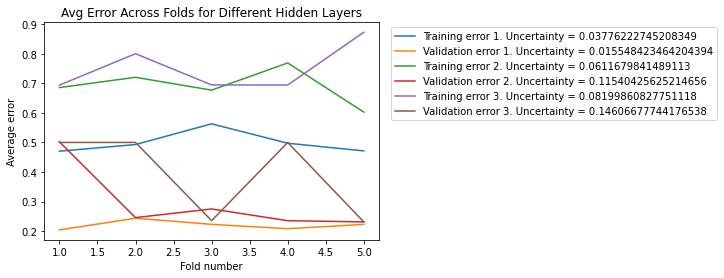

In [82]:
plt.title("Avg Error Across Folds for Different Hidden Layers")
plt.plot(range(1, 6), nn_avg_errtrain_1, label="Training error 1. Uncertainty = " + str(stdev(nn_avg_errtrain_1)))
plt.plot(range(1, 6), nn_val_err_1, label="Validation error 1. Uncertainty = " + str(stdev(nn_val_err_1)))
plt.plot(range(1, 6), nn_avg_errtrain_2, label="Training error 2. Uncertainty = " + str(stdev(nn_avg_errtrain_2)))
plt.plot(range(1, 6), nn_val_err_2, label="Validation error 2. Uncertainty = " + str(stdev(nn_val_err_2)))
plt.plot(range(1, 6), nn_avg_errtrain_3, label="Training error 3. Uncertainty = " + str(stdev(nn_avg_errtrain_3)))
plt.plot(range(1, 6), nn_val_err_3, label="Validation error 3. Uncertainty = " + str(stdev(nn_val_err_3)))
plt.xlabel("Fold number")
plt.ylabel("Average error")
plt.legend(bbox_to_anchor=(1.02, 1))
plt.show()

In [12]:
mlp_log = MLPClassifier([2], activation='logistic')
nn_scores_log = cross_val_score(mlp_log, transform_input, y_train_df, cv=5, scoring="neg_log_loss")
nnacc_scores_log = cross_validate(mlp_log, transform_input, y_train_df, cv=5, scoring=['accuracy'])
nn_val_err_log = nnacc_scores_log['test_accuracy']
nn_val_err_log = [1 - x for x in nn_val_err_log]
nn_avg_errtrain_log = -nn_scores_log

mlp_relu = MLPClassifier([2], activation='relu')
nn_scores_relu = cross_val_score(mlp_relu, transform_input, y_train_df, cv=5, scoring="neg_log_loss")
nnacc_scores_relu = cross_validate(mlp_relu, transform_input, y_train_df, cv=5, scoring=['accuracy'])
nn_val_err_relu = nnacc_scores_relu['test_accuracy']
nn_val_err_relu = [1 - x for x in nn_val_err_relu]
nn_avg_errtrain_relu = -nn_scores_relu

mlp_tanh = MLPClassifier([2], activation='tanh')
nn_scores_tanh = cross_val_score(mlp_tanh, transform_input, y_train_df, cv=5, scoring="neg_log_loss")
nnacc_scores_tanh = cross_validate(mlp_tanh, transform_input, y_train_df, cv=5, scoring=['accuracy'])
nn_val_err_tanh = nnacc_scores_tanh['test_accuracy']
nn_val_err_tanh = [1 - x for x in nn_val_err_tanh]
nn_avg_errtrain_tanh = -nn_scores_tanh

/opt/miniconda3/envs/ml135_env_sp21/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ml135_env_sp21/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ml135_env_sp21/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/miniconda3/envs/ml135_env_sp21/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  war

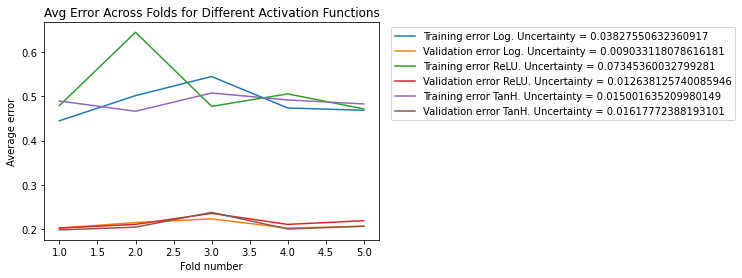

In [83]:
plt.title("Avg Error Across Folds for Different Activation Functions")
plt.plot(range(1, 6), nn_avg_errtrain_log, label="Training error Log. Uncertainty = " + str(stdev(nn_avg_errtrain_log)))
plt.plot(range(1, 6), nn_val_err_log, label="Validation error Log. Uncertainty = " + str(stdev(nn_val_err_log)))
plt.plot(range(1, 6), nn_avg_errtrain_relu, label="Training error ReLU. Uncertainty = " + str(stdev(nn_avg_errtrain_relu)))
plt.plot(range(1, 6), nn_val_err_relu, label="Validation error ReLU. Uncertainty = " + str(stdev(nn_val_err_relu)))
plt.plot(range(1, 6), nn_avg_errtrain_tanh, label="Training error TanH. Uncertainty = " + str(stdev(nn_avg_errtrain_tanh)))
plt.plot(range(1, 6), nn_val_err_tanh, label="Validation error TanH. Uncertainty = " + str(stdev(nn_val_err_tanh)))
plt.xlabel("Fold number")
plt.ylabel("Average error")
plt.legend(bbox_to_anchor=(1.02, 1))
plt.show()

In [24]:
final_mlp = MLPClassifier([2], activation='logistic')

final_mlp.fit(transform_input, y_train_df)

yproba1_test = final_mlp.predict_proba(transform_te_input)[:, 1] 
np.savetxt('yproba1_test.txt', yproba1_test)

/opt/miniconda3/envs/ml135_env_sp21/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
# Part 4 - SVM Classifier

param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3, scoring='neg_log_loss', return_train_score=True)
  
# fitting the model for grid search
grid.fit(transform_input, y_train_df)

yproba1_test = grid.predict_proba(transform_te_input)[:, 1] 
np.savetxt('yproba1_test.txt', yproba1_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=-0.609, test=-0.629) total time=  16.8s
[CV 2/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=-0.585, test=-0.635) total time=  15.5s
[CV 3/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=-0.549, test=-0.634) total time=  15.2s
[CV 4/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=-0.516, test=-0.590) total time=  15.1s
[CV 5/5] END C=0.1, gamma=1, kernel=rbf;, score=(train=-0.591, test=-0.627) total time=  15.2s
[CV 1/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=-0.693, test=-0.693) total time=  15.5s
[CV 2/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=-0.687, test=-0.689) total time=  14.8s
[CV 3/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=-0.688, test=-0.691) total time=  16.4s
[CV 4/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=-0.690, test=-0.691) total time=  16.0s
[CV 5/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=-0.684, test=-0.686

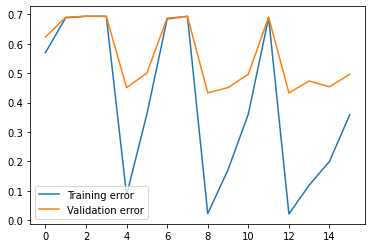

In [39]:
# train_scores = grid.cv_results_['mean_train_score']
val_scores = grid.cv_results_['mean_test_score']
val_scores = [-x for x in val_scores]
train_scores = grid.cv_results_['mean_train_score']
train_scores = [-x for x in train_scores]


# plt.plot(train_scores, label='Training error')
plt.plot(train_scores, label='Training error')
plt.plot(val_scores, label='Validation error')

# Add a legend and show the plot
plt.legend()
plt.show()

In [42]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [40]:
svm_1 = SVC(probability=True, C=0.1)
svm_scores_1 = cross_val_score(svm_1, transform_input, y_train_df, cv=5, scoring="neg_log_loss")
svm_acc_scores1 = cross_validate(svm_1, transform_input, y_train_df, cv=5, scoring=['accuracy'])
svm_val_err1 = svm_acc_scores1['test_accuracy']
svm_val_err1 = [1 - x for x in svm_val_err1]
svm_avg_errtrain1 = -svm_scores_1

svm_2 = SVC(probability=True, C=1)
svm_scores_2 = cross_val_score(svm_2, transform_input, y_train_df, cv=5, scoring="neg_log_loss")
svm_acc_scores2 = cross_validate(svm_2, transform_input, y_train_df, cv=5, scoring=['accuracy'])
svm_val_err2 = svm_acc_scores2['test_accuracy']
svm_val_err2 = [1 - x for x in svm_val_err2]
svm_avg_errtrain2 = -svm_scores_2

svm_3 = SVC(probability=True, C=10)
svm_scores_3 = cross_val_score(svm_3, transform_input, y_train_df, cv=5, scoring="neg_log_loss")
svm_acc_scores3 = cross_validate(svm_3, transform_input, y_train_df, cv=5, scoring=['accuracy'])
svm_val_err3 = svm_acc_scores3['test_accuracy']
svm_val_err3 = [1 - x for x in svm_val_err3]
svm_avg_errtrain3 = -svm_scores_3

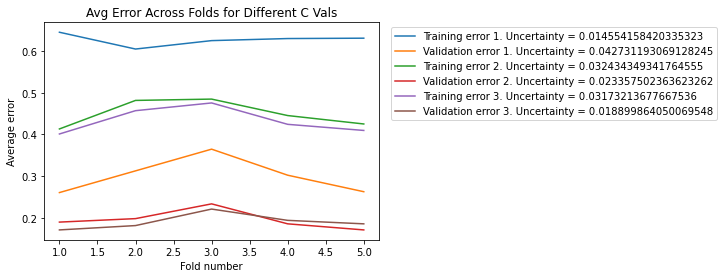

In [84]:
plt.title("Avg Error Across Folds for Different C Vals")
plt.plot(range(1, 6), svm_avg_errtrain1, label="Training error 1. Uncertainty = " + str(stdev(svm_avg_errtrain1)))
plt.plot(range(1, 6), svm_val_err1, label="Validation error 1. Uncertainty = " + str(stdev(svm_val_err1)))
plt.plot(range(1, 6), svm_avg_errtrain2, label="Training error 2. Uncertainty = " + str(stdev(svm_avg_errtrain2)))
plt.plot(range(1, 6), svm_val_err2, label="Validation error 2. Uncertainty = " + str(stdev(svm_val_err2)))
plt.plot(range(1, 6), svm_avg_errtrain3, label="Training error 3. Uncertainty = " + str(stdev(svm_avg_errtrain3)))
plt.plot(range(1, 6), svm_val_err3, label="Validation error 3. Uncertainty = " + str(stdev(svm_val_err3)))
plt.xlabel("Fold number")
plt.ylabel("Average error")
plt.legend(bbox_to_anchor=(1.02, 1))
plt.show()

In [43]:
svm_g1 = SVC(probability=True, C=10, gamma=1)
svm_scores_1g = cross_val_score(svm_g1, transform_input, y_train_df, cv=5, scoring="neg_log_loss")
svm_acc_scores1g = cross_validate(svm_g1, transform_input, y_train_df, cv=5, scoring=['accuracy'])
svm_val_err1g = svm_acc_scores1g['test_accuracy']
svm_val_err1g = [1 - x for x in svm_val_err1g]
svm_avg_errtrain1g = -svm_scores_1g

svm_g2 = SVC(probability=True, C=10, gamma=0.1)
svm_scores_g2 = cross_val_score(svm_g2, transform_input, y_train_df, cv=5, scoring="neg_log_loss")
svm_acc_scoresg2 = cross_validate(svm_g2, transform_input, y_train_df, cv=5, scoring=['accuracy'])
svm_val_errg2 = svm_acc_scoresg2['test_accuracy']
svm_val_errg2 = [1 - x for x in svm_val_errg2]
svm_avg_errtraing2 = -svm_scores_g2


In [45]:
svm_g3 = SVC(probability=True, C=10, gamma=0.01)
svm_scores_g3 = cross_val_score(svm_g3, transform_input, y_train_df, cv=5, scoring="neg_log_loss")
svm_acc_scoresg3 = cross_validate(svm_g3, transform_input, y_train_df, cv=5, scoring=['accuracy'])
svm_val_errg3 = svm_acc_scoresg3['test_accuracy']
svm_val_errg3 = [1 - x for x in svm_val_errg3]
svm_avg_errtraing3 = -svm_scores_g3

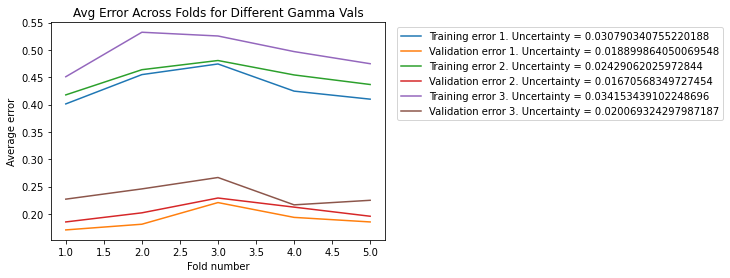

In [85]:
plt.title("Avg Error Across Folds for Different Gamma Vals")
plt.plot(range(1, 6), svm_avg_errtrain1g, label="Training error 1. Uncertainty = " + str(stdev(svm_avg_errtrain1g)))
plt.plot(range(1, 6), svm_val_err1g, label="Validation error 1. Uncertainty = " + str(stdev(svm_val_err1g)))
plt.plot(range(1, 6), svm_avg_errtraing2, label="Training error 2. Uncertainty = " + str(stdev(svm_avg_errtraing2)))
plt.plot(range(1, 6), svm_val_errg2, label="Validation error 2. Uncertainty = " + str(stdev(svm_val_errg2)))
plt.plot(range(1, 6), svm_avg_errtraing3, label="Training error 3. Uncertainty = " + str(stdev(svm_avg_errtraing3)))
plt.plot(range(1, 6), svm_val_errg3, label="Validation error 3. Uncertainty = " + str(stdev(svm_val_errg3)))
plt.xlabel("Fold number")
plt.ylabel("Average error")
plt.legend(bbox_to_anchor=(1.02, 1))
plt.show()